DSC-630-T302
Chitramoy Mukherjee
Date : 05/01/2024
Week8 - Exercise 8.2 - Time Series Modeling

You will be using the dataset us_retail_sales.csv for this assignment. This data gives the total monthly retail sales in the US from January 1992 until June 2021. With this dataset, complete the following steps:
1. Plot the data with proper labeling and make some observations on the graph.
2. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.
3. Use the training set to build a predictive model for the monthly retail sales.
4. Use the model to predict the monthly retail sales on the last year of data.
5. Report the RMSE of the model predictions on the test set.
You can use R or Python to complete this assignment. Submit your code and output to the submission link. Make sure to add comments to all of your code and to document your steps, process, and analysis.

In [9]:
# import libraries
import pandas as pd
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
%matplotlib inline
import statsmodels.api as sm

In [10]:
# Load the dataset
df = pd.read_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-630\\Week-8\\us_retail_sales.csv')

# Preview the dataframe
df.head(5)


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [11]:
#expand the dataframe
df_2 = pd.melt(df, id_vars=['YEAR'], var_name="MONTH", value_name="SALES")
#convert months to numerical value
df_2['Month'] = df_2['MONTH'].map({'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12})
#create year-month-date conversion
df_2['DATE']=pd.to_datetime(df_2[['YEAR','Month']].assign(DAY=1))
# create dataframe with only needed columns
df_new = df_2[['DATE','SALES']].sort_values('DATE')
df_new = df_new.dropna()
# preview new dataframe
df_new.head(10)

,DATE,SALES
0,1992-01-01,146925.0
30,1992-02-01,147223.0
60,1992-03-01,146805.0
90,1992-04-01,148032.0
120,1992-05-01,149010.0
150,1992-06-01,149800.0
180,1992-07-01,150761.0
210,1992-08-01,151067.0
240,1992-09-01,152588.0
270,1992-10-01,153521.0


In [12]:
# Check the shape of the dataframe. 354 records and 2 columns
df_new.shape

(354, 2)

In [14]:
# Checking the dtypes of the variables
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    354 non-null    datetime64[ns]
 1   SALES   354 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.3 KB


## Plot the data with proper labeling and make some observations on the graph.

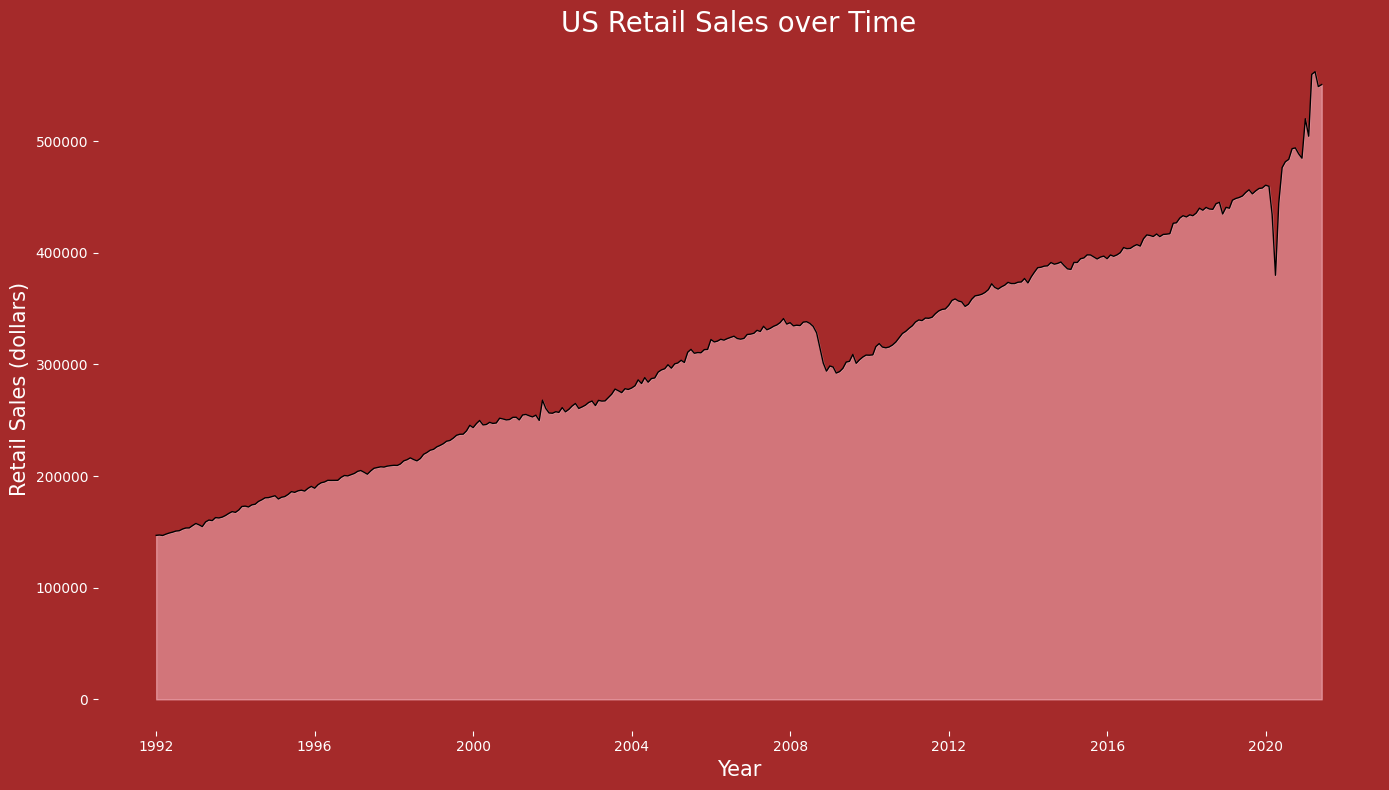

In [15]:
#create an area chart to show Sales vs Date
fig = plt.figure(figsize=(14,8), facecolor='brown')
plt.plot(df_new['DATE'], df_new['SALES'], linewidth=1, color='black')
plt.fill_between(df_new['DATE'], df_new['SALES'], color='pink', alpha=0.5)
plt.box(False)
plt.title('US Retail Sales over Time', fontsize=20, color='white')
plt.xlabel('Year', color='white', fontsize=15)
plt.ylabel('Retail Sales (dollars) ', color='white', fontsize=15)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.tight_layout()
plt.show()

Clearly, the time series is not stationary, as its mean is not constant through time, and we see an increasing variance in the data, a sign of heteroscedasticity.
The graph depicts a steady increase in retail revenue each year with an exception of 2008 and 2020. During the years of 2007 to 2009, the economy was entering 
a downturn due to the great recession due to lax lending in the mortgage housing market. In the year of 2020, the Covid-19 Pandemic slowed spending for
many due to being in various lockdown situations. Definitely have upward
sales trend.

In [16]:
#set the date as the index
df_new.set_index("DATE",inplace=True)

In [17]:
df_new.tail()
#### Analyzing the chart, I can observe that the time-series has seasonality pattern. There is an upward trend over the years as well.

,SALES
DATE,
2021-02-01,504458.0
2021-03-01,559871.0
2021-04-01,562269.0
2021-05-01,548987.0
2021-06-01,550782.0


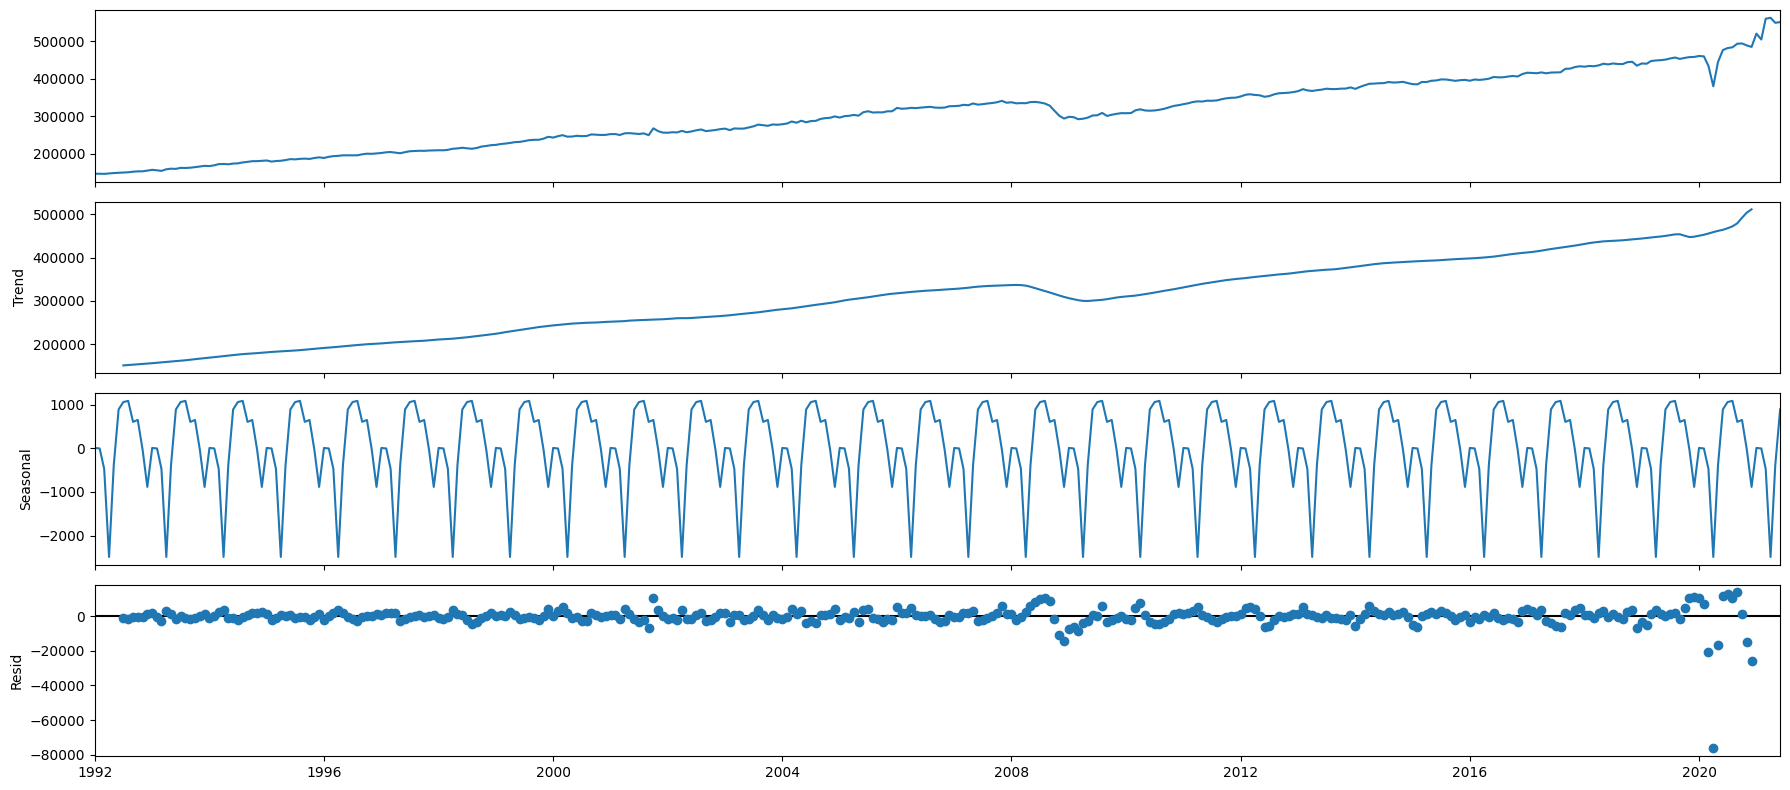

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_new, model='additive')
fig = decomposition.plot()
plt.show()

# Using the “sm.tsa.seasonal_decompose” command from the pylab library I can decompose the time-series into three distinct components: trend, 
# seasonality, and noise. I can see upward sales trend over the year and also seasonality effect yearly by looking at the plot above.

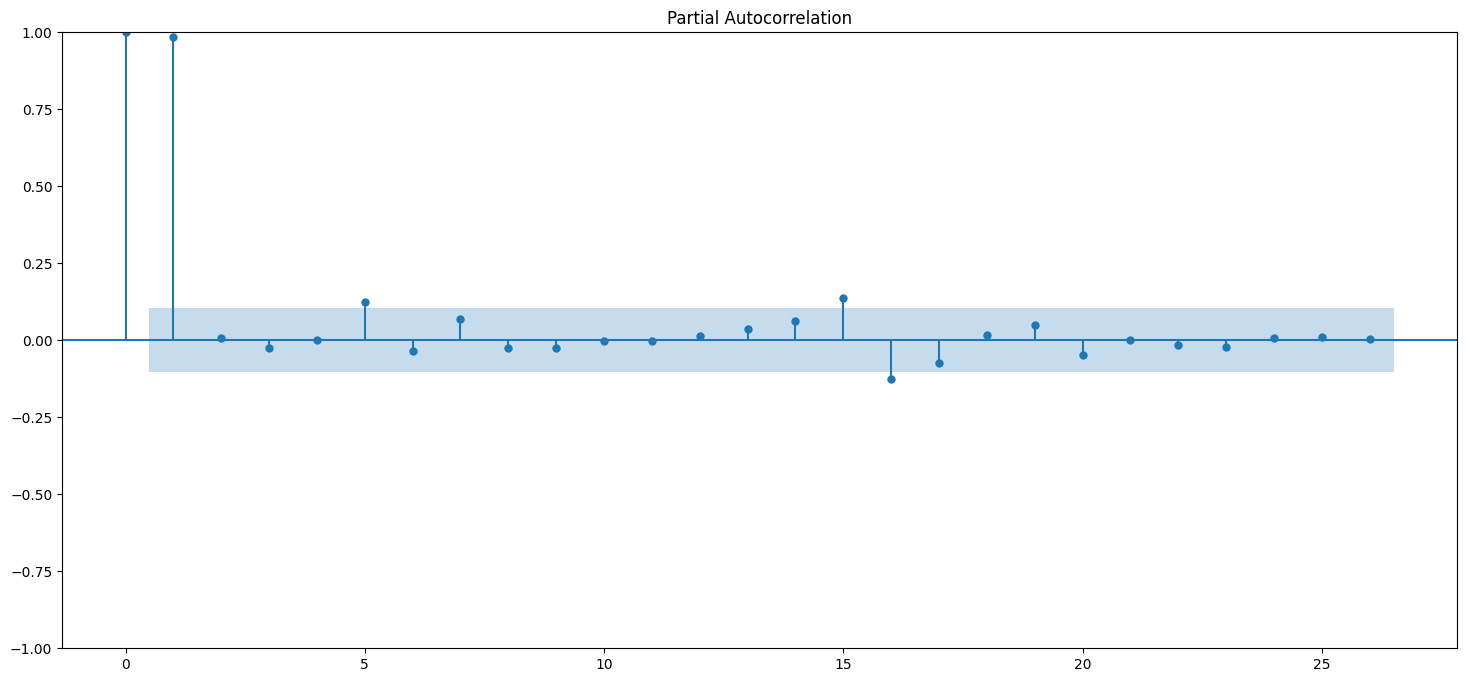

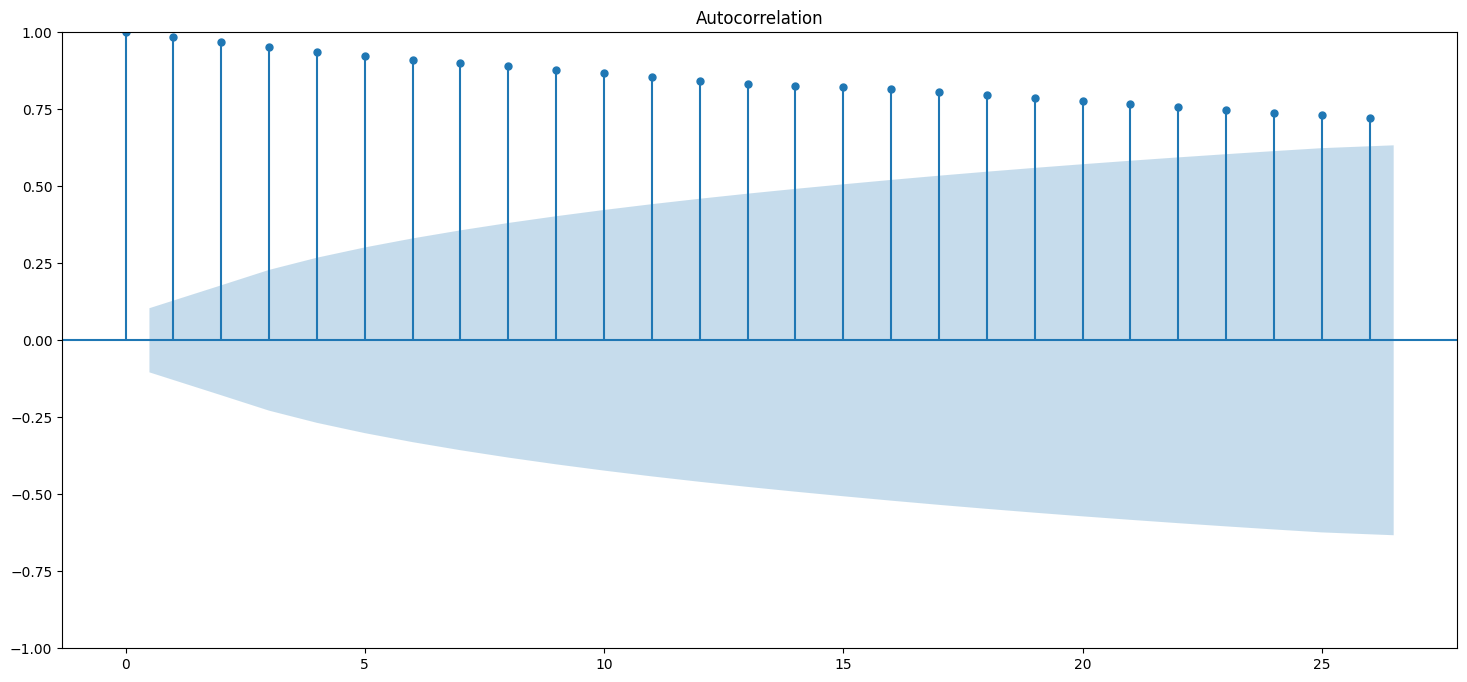

In [19]:
# To make sure, let’s plot the PACF and ACF:
plot_pacf(df_new['SALES']);
plot_acf(df_new['SALES']);

In [20]:
# Again, no information can be deduced from those plots. I can further test for stationarity with the Augmented
# Dickey-Fuller test:
ad_fuller_result = adfuller(df_new['SALES'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 1.4490526692726289
p-value: 0.9973259755033455


In [21]:
# Now, let’s take the differencinng in an effort to make it stationary:
data = df_new.copy()
data['Sales First Differencing'] = data['SALES'] - data['SALES'].shift(1)
data['Seasonal First Differencing'] = data['SALES'] - data['SALES'].shift(12)
data.head()

,SALES,Sales First Differencing,Seasonal First Differencing
DATE,,,
1992-01-01,146925.0,NaN,NaN
1992-02-01,147223.0,298.0,NaN
1992-03-01,146805.0,-418.0,NaN
1992-04-01,148032.0,1227.0,NaN
1992-05-01,149010.0,978.0,NaN


In [22]:
# Dickey-Fuller test:
ad_fuller_result = adfuller(data['Seasonal First Differencing'].dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.2393804106097703
p-value: 0.1922642410718154


In [23]:
# Dickey-Fuller test:
ad_fuller_result = adfuller(data['Sales First Differencing'].dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.7280371246391555
p-value: 0.06931100597169161


### Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [24]:
# build the train, test set
train, test = df_new[df_new.index < '2020-07-01'], df_new[df_new.index >= '2020-07-01']
train.head()

,SALES
DATE,
1992-01-01,146925.0
1992-02-01,147223.0
1992-03-01,146805.0
1992-04-01,148032.0
1992-05-01,149010.0


In [19]:
test.head()

,SALES
DATE,
2020-07-01,481627.0
2020-08-01,483716.0
2020-09-01,493327.0
2020-10-01,493991.0
2020-11-01,488652.0


### Use the training set to build a predictive model for the monthly retail sales.


In [25]:
#Instantiate and fit the AR model with training data
ar_model = AutoReg(train, lags=3).fit()

#print summary
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  SALES   No. Observations:                  342
Model:                     AutoReg(3)   Log Likelihood               -3396.835
Method:               Conditional MLE   S.D. of innovations           5438.308
Date:                Sun, 05 May 2024   AIC                           6803.670
Time:                        17:12:27   BIC                           6822.800
Sample:                    04-01-1992   HQIC                          6811.293
                         - 06-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2087.5148   1076.084      1.940      0.052     -21.572    4196.601
SALES.L1       0.8672      0.054     15.942      0.000       0.761       0.974
SALES.L2      -0.3893      0.076     -5.129      0.0

### Use the model to predict the monthly retail sales on the last year of data.

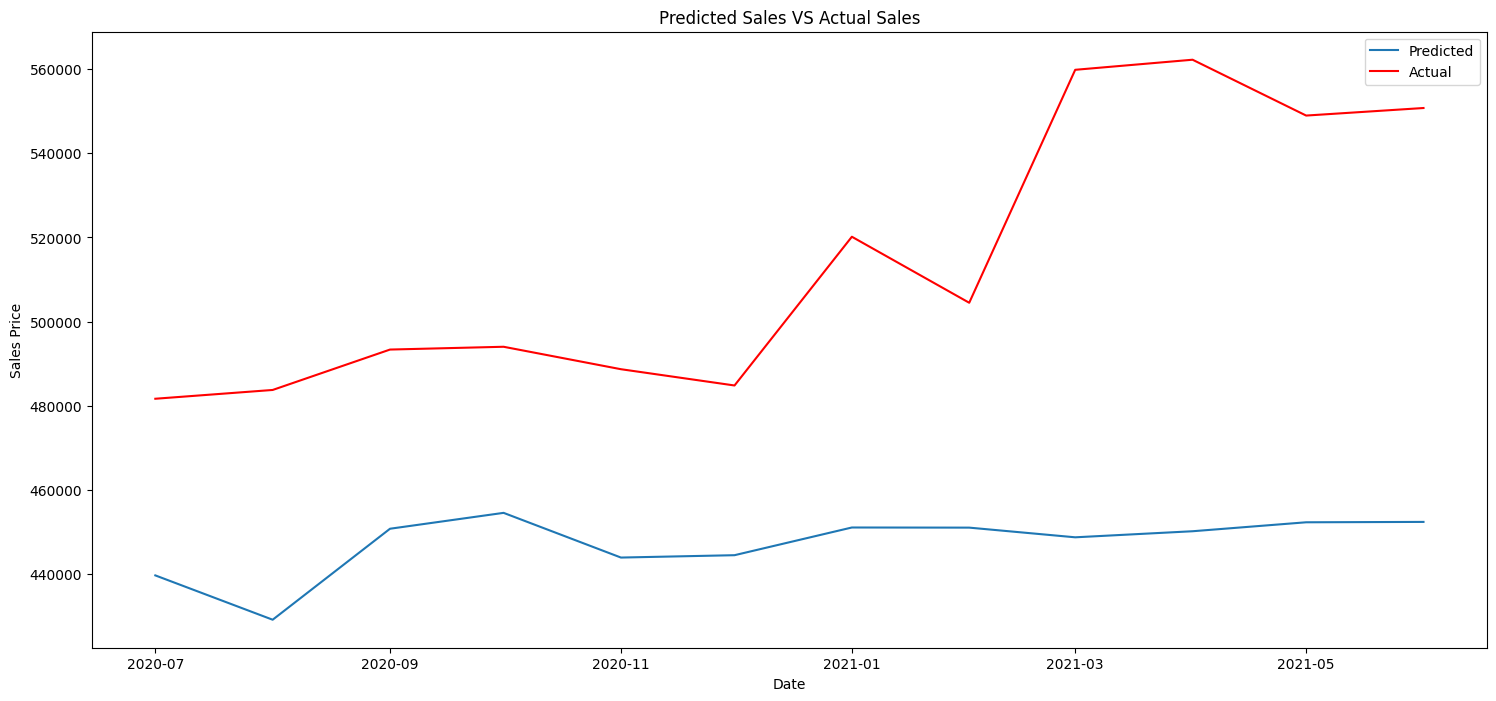

In [26]:
# Make the predictions
pred = ar_model.predict(start=len(train), end=(len(df_new)-1), dynamic=False)
# Plot the prediction vs test data
from matplotlib import pyplot
pyplot.plot(pred, label='Predicted')
pyplot.plot(test, color='red', label='Actual')
plt.title("Predicted Sales VS Actual Sales")
plt.xlabel("Date")
plt.ylabel("Sales Price")
plt.legend()

### Report the RMSE of the model predictions on the test set.

In [27]:
# Find the square root of the mean of test sales value minus the predict test sales values
rmse = sqrt(mean_squared_error(test, pred))
print('Test RMSE is %.3f' % rmse)

Test RMSE is 72691.589


Summary The unusual high RMSE value signifies that the autoregressive model is not optimal for this exercise. The important value is an indication of how close the predictions are to the actual values.
Lower values of RMSE indicate a better fit. RMSE is a worthy measure of how accurately the model predicts the response. It can be the most important criterion for fit if the main purpose of the model
is prediction. An explanation for the gap in prediction and actual could be that there was an unusual spike in sales during the period of prediction time frame.

### Moving Average Model

In [28]:
df_new['lag1'] = df_new['SALES'].shift(1)

In [29]:
df_new['Resid'] = df_new['SALES'] - df_new['lag1']

In [30]:
df_new.reset_index(inplace=True)

In [31]:
df_new.head()

,DATE,SALES,lag1,Resid
0,1992-01-01,146925.0,NaN,NaN
1,1992-02-01,147223.0,146925.0,298.0
2,1992-03-01,146805.0,147223.0,-418.0
3,1992-04-01,148032.0,146805.0,1227.0
4,1992-05-01,149010.0,148032.0,978.0


In [32]:
train, test = df_new.Resid[df_new.DATE < '2020-07-01'], df_new.Resid[df_new.DATE >= '2020-07-01']
train

0          NaN
1        298.0
2       -418.0
3       1227.0
4        978.0
        ...   
337     -976.0
338   -25329.0
339   -54389.0
340    64739.0
341    31712.0
Name: Resid, Length: 342, dtype: float64

In [34]:
#Instantiate and fit the AR model with training data
ar_model = AutoReg(train.iloc[1:], lags=3).fit()

In [35]:
#print summary
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Resid   No. Observations:                  341
Model:                     AutoReg(3)   Log Likelihood               -3386.071
Method:               Conditional MLE   S.D. of innovations           5426.349
Date:                Sun, 05 May 2024   AIC                           6782.141
Time:                        17:13:04   BIC                           6801.256
Sample:                             3   HQIC                          6789.759
                                  341                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1577.0546    314.705      5.011      0.000     960.244    2193.865
Resid.L1      -0.1476      0.055     -2.680      0.007      -0.256      -0.040
Resid.L2      -0.4918      0.071     -6.975      0.0

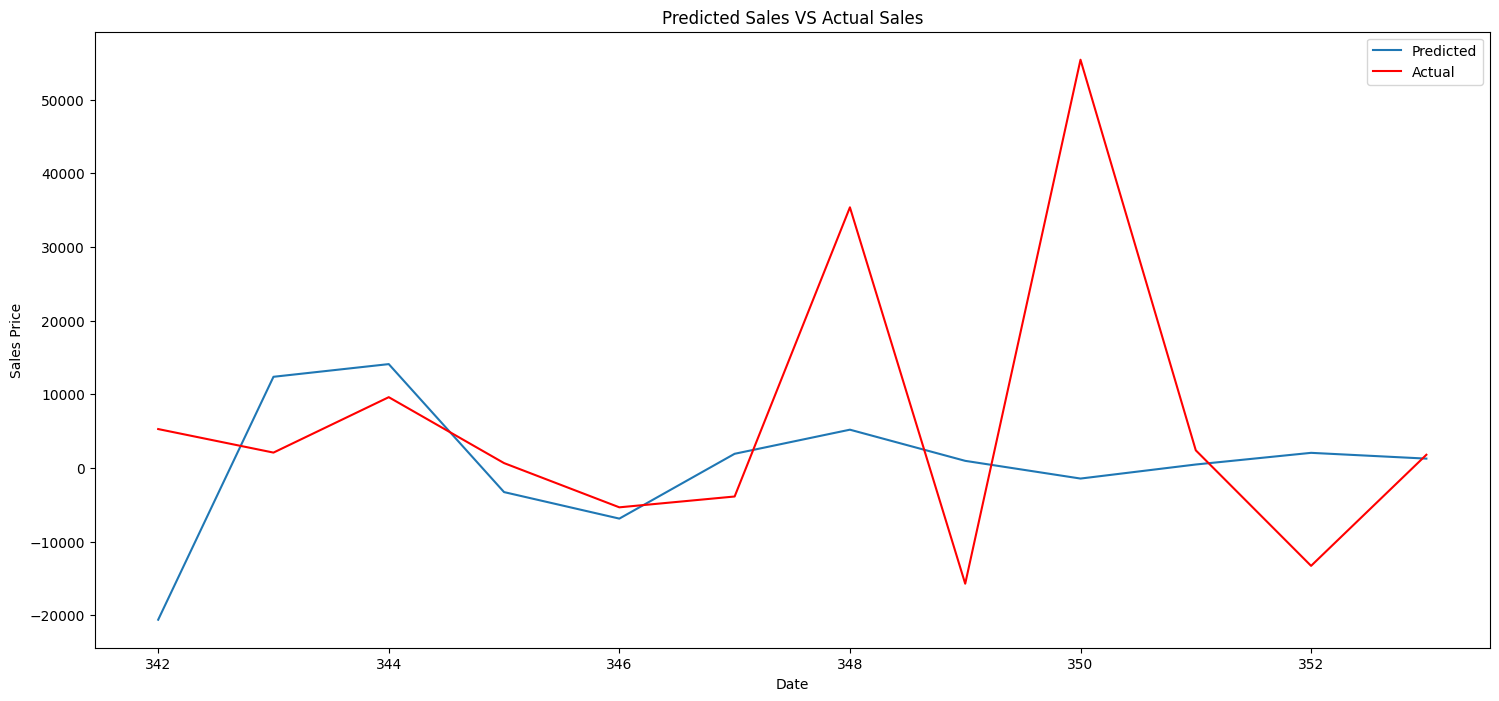

In [151]:
# Make the predictions
pred = ar_model.predict(start=len(train), end=(len(df_new)-1), dynamic=False)
# Plot the prediction vs test data
from matplotlib import pyplot
pyplot.plot(pred, label='Predicted')
pyplot.plot(test, color='red', label='Actual')
plt.title("Predicted Sales VS Actual Sales")
plt.xlabel("Date")
plt.ylabel("Sales Price")
plt.legend()
plt.show()

In [36]:
# Find the square root of the mean of test sales value minus the predict test sales values
rmse = sqrt(mean_squared_error(test, pred))
print('Test RMSE is %.3f' % rmse)

Test RMSE is 441541.556


Summary With Moving Average Model, RMSE errors are reduced significantly. Since I used reseduals to predict future sales get some advantages.

### ARIMA model :

In [37]:
df_arima = df_new.copy()
df_arima.head()

,DATE,SALES,lag1,Resid
0,1992-01-01,146925.0,NaN,NaN
1,1992-02-01,147223.0,146925.0,298.0
2,1992-03-01,146805.0,147223.0,-418.0
3,1992-04-01,148032.0,146805.0,1227.0
4,1992-05-01,149010.0,148032.0,978.0


In [38]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [39]:
test_result=adfuller(df_arima['SALES'])

In [40]:
def adfuller_test(sales):
     result=adfuller(sales)
     labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
     for value,label in zip(result,labels):
         print(label+' : '+str(value) )
     if result[1] <= 0.05:
         print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
     else:
         print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [41]:
adfuller_test(df_arima['SALES'])

ADF Test Statistic : 1.4490526692726289
p-value : 0.9973259755033455
#Lags Used : 12
Number of Observations Used : 341
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [43]:
# Differencinng
df_arima['Sales First Difference'] = df_arima['SALES'] - df_arima['SALES'].shift(1)

In [44]:
df_arima['Seasonal First Difference']=df_arima['SALES']-df_arima['SALES'].shift(12)

In [45]:
df_arima.head(13)

,DATE,SALES,lag1,Resid,Sales First Difference,Seasonal First Difference
0,1992-01-01,146925.0,NaN,NaN,NaN,NaN
1,1992-02-01,147223.0,146925.0,298.0,298.0,NaN
2,1992-03-01,146805.0,147223.0,-418.0,-418.0,NaN
3,1992-04-01,148032.0,146805.0,1227.0,1227.0,NaN
4,1992-05-01,149010.0,148032.0,978.0,978.0,NaN
5,1992-06-01,149800.0,149010.0,790.0,790.0,NaN
6,1992-07-01,150761.0,149800.0,961.0,961.0,NaN
7,1992-08-01,151067.0,150761.0,306.0,306.0,NaN
8,1992-09-01,152588.0,151067.0,1521.0,1521.0,NaN
9,1992-10-01,153521.0,152588.0,933.0,933.0,NaN


In [165]:
## Again test dickey fuller test
adfuller_test(df_arima['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.2393804106097703
p-value : 0.1922642410718154
#Lags Used : 16
Number of Observations Used : 325
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<Axes: xlabel='DATE'>

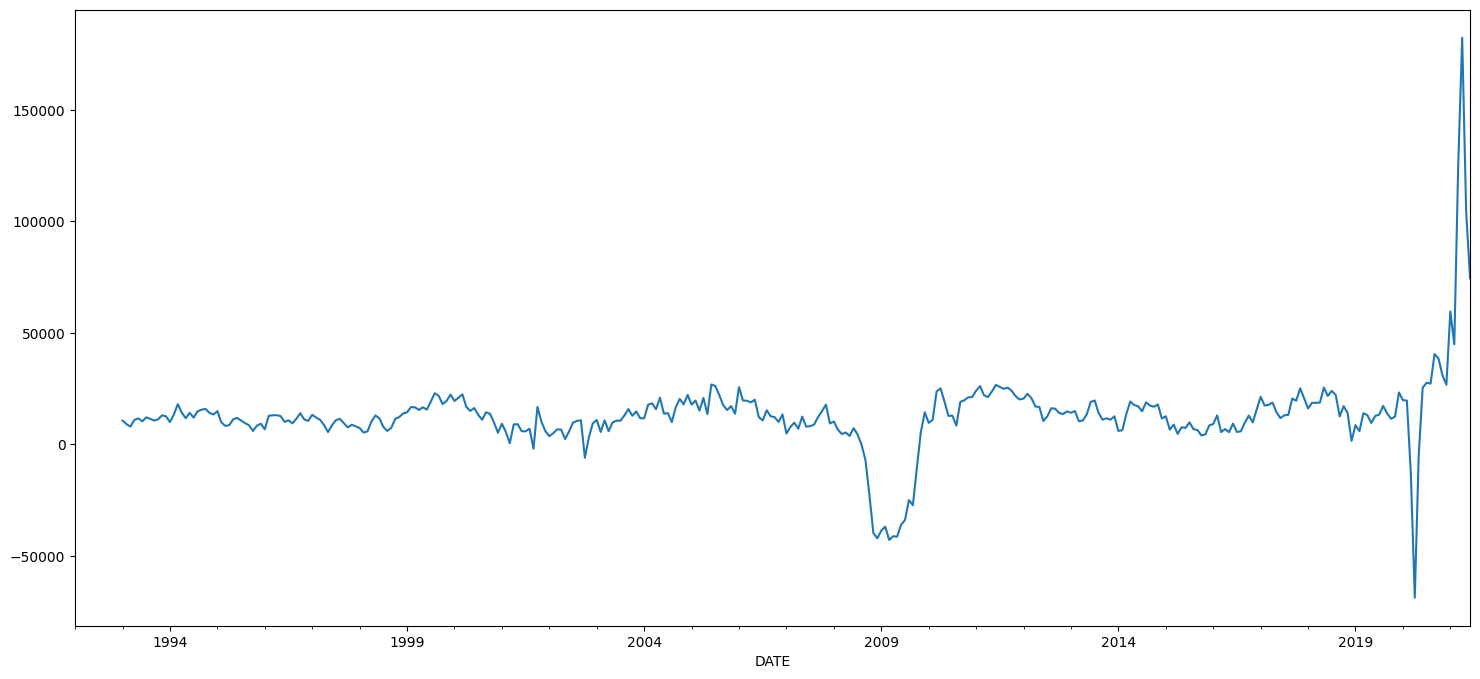

In [46]:
df_arima.set_index("DATE")['Seasonal First Difference'].plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

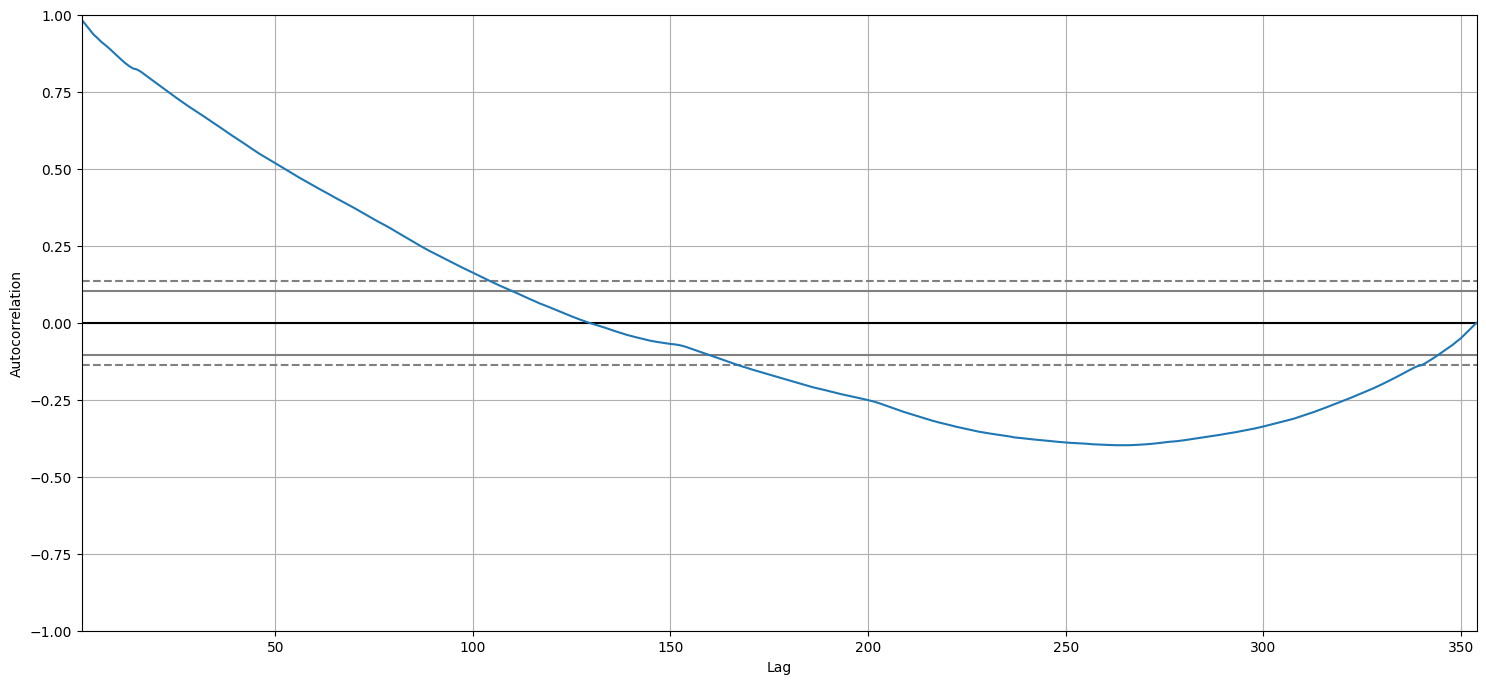

In [46]:
# Auto correlation Plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_arima['SALES'])

In [47]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

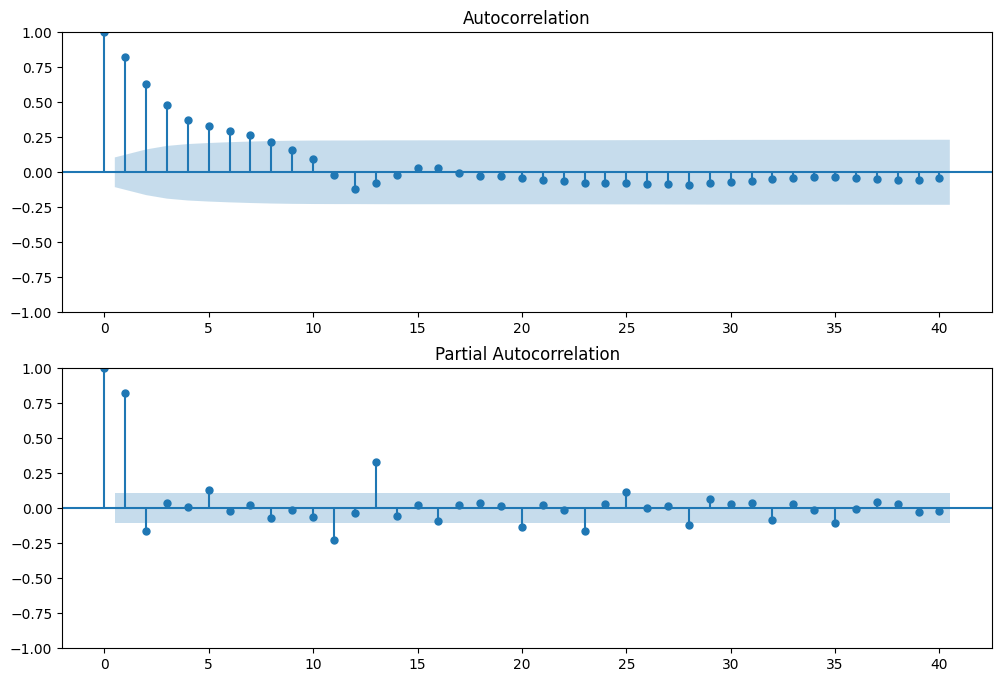

In [48]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_arima['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_arima['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [49]:
# For non-seasonal data
#p=8, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [50]:
df_arima = df_arima.set_index("DATE")

In [57]:
train, test = df_arima[df_arima.index < '2020-07-01'], df_arima[df_arima.index >= '2020-07-01']

In [52]:
model=ARIMA(train['SALES'],order=(8,1,1))
model_fit=model.fit()

In [58]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  SALES   No. Observations:                  342
Model:                 ARIMA(8, 1, 1)   Log Likelihood               -3436.232
Date:                Sun, 05 May 2024   AIC                           6892.464
Time:                        17:14:44   BIC                           6930.782
Sample:                    01-01-1992   HQIC                          6907.730
                         - 06-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9662      0.019     49.870      0.000       0.928       1.004
ar.L2         -0.0954      0.018     -5.198      0.000      -0.131      -0.059
ar.L3          0.0867      0.044      1.961      0.050     4.2e-05       0.173
ar.L4          0.0405      0.186      0.218      0.828      -0.324       0.405
ar.L5         -0.0080      0.238     -0.034      0.973      -0.474       0.458
ar.L6          0.0244      0.145      0.169      0.866      -0.259       0.308
ar.L7         -0.0067      0.115     -0.059      0.953      -0.233       0.219
ar.L8         -0.0077      0.087     -0.088      0.930      -0.179       0.164
ma.L1         -0.9991      0.028    -36.223      0.000      -1.053      -0.945
sigma2      3.089e+07   1.79e-08   1.73e+15      0.000    3.09e+07    3.09e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):             49619.23
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):              14.81   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        62.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.69e+30. Standard errors may be unstable.
"""

In [54]:
test

,SALES,lag1,Resid,Sales First Difference,Seasonal First Difference
DATE,,,,,
2020-07-01,481627.0,476343.0,5284.0,5284.0,27615.0
2020-08-01,483716.0,481627.0,2089.0,2089.0,27216.0
2020-09-01,493327.0,483716.0,9611.0,9611.0,40478.0
2020-10-01,493991.0,493327.0,664.0,664.0,38505.0
2020-11-01,488652.0,493991.0,-5339.0,-5339.0,30994.0
2020-12-01,484782.0,488652.0,-3870.0,-3870.0,26727.0
2021-01-01,520162.0,484782.0,35380.0,35380.0,59576.0
2021-02-01,504458.0,520162.0,-15704.0,-15704.0,44848.0
2021-03-01,559871.0,504458.0,55413.0,55413.0,125590.0


<Axes: xlabel='DATE'>

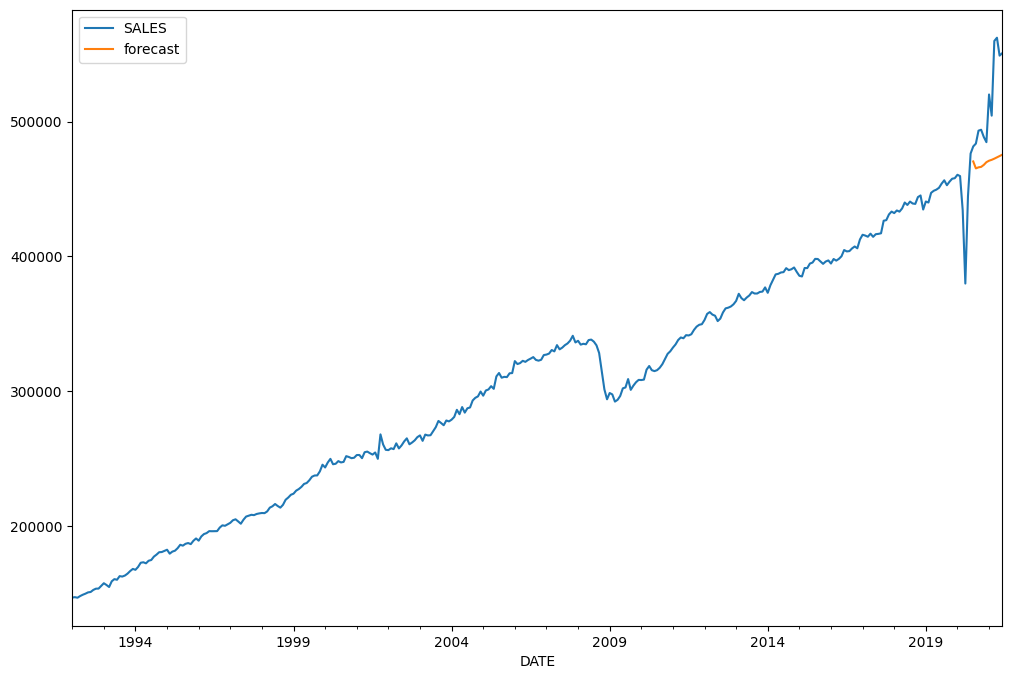

In [59]:
df_arima['forecast']=model_fit.predict(start='2020-07-01',end='2021-06-01',dynamic=True)
df_arima[['SALES','forecast']].plot(figsize=(12,8))


In [60]:
df_arima.tail(12)

,SALES,lag1,Resid,Sales First Difference,Seasonal First Difference,forecast
DATE,,,,,,
2020-07-01,481627.0,476343.0,5284.0,5284.0,27615.0,470465.117037
2020-08-01,483716.0,481627.0,2089.0,2089.0,27216.0,465331.907771
2020-09-01,493327.0,483716.0,9611.0,9611.0,40478.0,466105.147904
2020-10-01,493991.0,493327.0,664.0,664.0,38505.0,466443.805832
2020-11-01,488652.0,493991.0,-5339.0,-5339.0,30994.0,467904.230481
2020-12-01,484782.0,488652.0,-3870.0,-3870.0,26727.0,469946.603227
2021-01-01,520162.0,484782.0,35380.0,35380.0,59576.0,471026.856631
2021-02-01,504458.0,520162.0,-15704.0,-15704.0,44848.0,471680.073761
2021-03-01,559871.0,504458.0,55413.0,55413.0,125590.0,472540.337572


Conclusion :
The unusual high RMSE value signifies that the autoregressive model is not optimal for this exercise. The important value is an indication of how close the predictions are to the actual values. Lower values of RMSE indicate a better fit. RMSE is a worthy measure of how accurately the model predicts the response. It can be the most important criterion for fit if the main purpose of the model is prediction. An explanation for the gap in prediction and actual could be that there was an unusual spike in sales during the period of prediction time frame.
With Moving Average Model, RMSE errors are reduced significantly. Since I used reseduals to predict future sales get some advantages.
ARIMA model doesn't consider seasanility causing the prediction is not good but SARIMA model can predict the sales more accurately because of the season consideration but the  SARIMA model code execusion didn't gave any output because of that I couldn't compared the SARIMA output with other model output.

model=sm.tsa.statespace.SARIMAX(train.SALES,order=(8, 1, 1),seasonal_order=(8,1,1,12))
results=model.fit()
df_arima['forecast']=results.predict(start='2020-07-01',end='2021-06-01',dynamic=True)
df_arima[['SALES','forecast']].plot(figsize=(12,8))